In [300]:
from geometry import * # custom module used for MRE data creation and visualization
from shapely import voronoi_polygons
from shapely.ops import nearest_points
from sklearn.neighbors import NearestNeighbors
from scipy.ndimage import uniform_filter1d
import numpy as np
from math import ceil
from sklearn.cluster import DBSCAN, OPTICS, KMeans
from shapely.geometry import MultiPolygon, MultiPoint
from scipy.spatial import cKDTree
import warnings
warnings.filterwarnings('ignore')

## <a id='toc1_2_'></a>[I: MRE (Minimum Reproducible Example) Data](#toc0_)
### <a id='toc1_2_1_'></a>[County and Place Data](#toc0_)
Place boundaries represent locally dense urban areas. Boundaries will be used initally as a proxy for regional parcel density where adaptive eps will be calcualted. 

In [301]:
county1 = mPolygon(origin=(0,0), size=(25,25), alpha=0, edgecolor='red', linestyle='--')

In [302]:
place1 = mPolygon(origin=(0, 0), size=(10, 10))
place2 = mPolygon(origin=(0, 12), size=(10, 10))
place3 = mPolygon(origin=(14, 0), size=(10, 25))
places = [place1, place2, place3]

place_data = {
    'Place': ['P1', 'P2', 'P3']
}
place_gdf = GeoDataFrame(place_data, places).build()
place_gdf

,Place,geometry
0,P1,"POLYGON ((0.00000 0.00000, 10.00000 0.00000, 1..."
1,P2,"POLYGON ((0.00000 12.00000, 10.00000 12.00000,..."
2,P3,"POLYGON ((14.00000 0.00000, 24.00000 0.00000, ..."


In [303]:
map = Map()

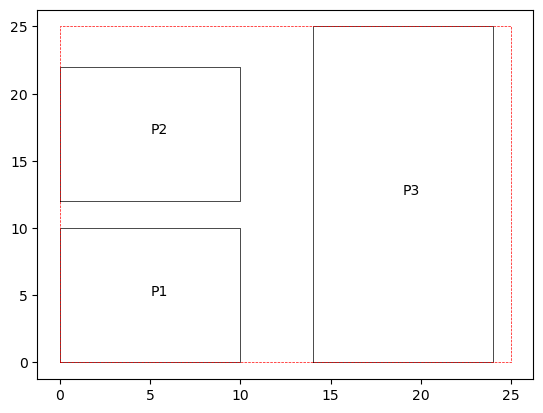

In [304]:
map.add_gdf(place_gdf, label='Place', alpha=0)
map.add_shape(county1)
map.plot()

### <a id='toc1_2_2_'></a>[Places 1 Parcel Data](#toc0_)

In [305]:
p1_1 = mPolygon(origin=(0, 0), size=(2,2))
p1_2 = mPolygon(origin=(0,2), size=(2,2))
p1_3 = mPolygon(origin=(0,4), size=(2,2))
p1_4 = mPolygon(origin=(0,6), size=(2,2))
p1_5 = mPolygon(origin=(0,8), size=(2,2))
p1_6 = mPolygon(origin=(2,0), size=(2,2))
p1_7 = mPolygon(origin=(2,2), size=(2,2))
p1_8 = mPolygon(origin=(2,4), size=(2,2))
p1_9 = mPolygon(origin=(2,6), size=(2,2))
p1_10 = mPolygon(origin=(2,8), size=(2,2))

p1_11 = mPolygon(origin=(6,0), size=(2,2))
p1_12 = mPolygon(origin=(6,2), size=(2,2))
p1_13 = mPolygon(origin=(6,4), size=(2,2))
p1_14 = mPolygon(origin=(6,6), size=(2,2))
p1_15 = mPolygon(origin=(6,8), size=(2,2))
p1_16 = mPolygon(origin=(8,0), size=(2,2))
p1_17 = mPolygon(origin=(8,2), size=(2,2))
p1_18 = mPolygon(origin=(8,4), size=(2,2))
p1_19 = mPolygon(origin=(8,6), size=(2,2))
p1_20 = mPolygon(origin=(8,8), size=(2,2))

p1_parcels = [p1_1, p1_2, p1_3, p1_4, p1_5, p1_6, p1_7, p1_8, p1_9, p1_10, p1_11, p1_12, p1_13, p1_14, p1_15, p1_16, p1_17, p1_18, p1_19, p1_20]

p1_parcel_data = {
    'OWNER': ['D', 'D', 'F', 'E', 'E', 'A', 'D', 'E', 'E', 'E', 'A', 'D', 'D', 'C', 'F', 'B', 'B', 'C', 'F', 'F']
}
p1_parcel_gdf = GeoDataFrame(p1_parcel_data, p1_parcels).build()

# add line to map
#p1_line = mLine(coords=[(5, 0), (5, 10)], color='black')



In [306]:
map.add_gdf(p1_parcel_gdf, label='OWNER', alpha=0.2, color='blue')

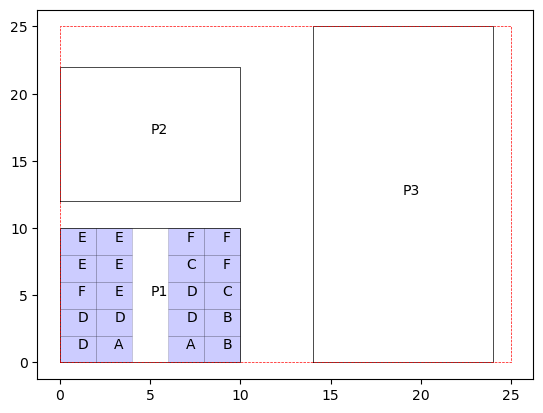

In [307]:
map.plot()

### <a id='toc1_2_3_'></a>[Places 2 Parcel Data](#toc0_)

In [308]:
p2_1 = mPolygon(origin=(0, 12), size=(2,2))
p2_2 = mPolygon(origin=(0,14), size=(2,2))
p2_3 = mPolygon(origin=(0,16), size=(2,2))
p2_4 = mPolygon(origin=(0,18), size=(2,2))
p2_5 = mPolygon(origin=(0,20), size=(2,2))
p2_6 = mPolygon(origin=(2,12), size=(2,2))
p2_7 = mPolygon(origin=(2,14), size=(2,2))
p2_8 = mPolygon(origin=(2,16), size=(2,2))
p2_9 = mPolygon(origin=(2,18), size=(2,2))
p2_10 = mPolygon(origin=(2,20), size=(2,2))

p2_11 = mPolygon(origin=(6,12), size=(2,2))
p2_12 = mPolygon(origin=(6,14), size=(2,2))
p2_13 = mPolygon(origin=(6,16), size=(2,2))
p2_14 = mPolygon(origin=(6,18), size=(2,2))
p2_15 = mPolygon(origin=(6,20), size=(2,2))
p2_16 = mPolygon(origin=(8,12), size=(2,2))
p2_17 = mPolygon(origin=(8,14), size=(2,2))
p2_18 = mPolygon(origin=(8,16), size=(2,2))
p2_19 = mPolygon(origin=(8,18), size=(2,2))
p2_20 = mPolygon(origin=(8,20), size=(2,2))


p2_parcels = [p2_1, p2_2, p2_3, p2_4, p2_5, p2_6, p2_7, p2_8, p2_9, p2_10, p2_11, p2_12, p2_13, p2_14, p2_15, p2_16, p2_17, p2_18, p2_19, p2_20]

p2_parcel_data = {
    'OWNER': ['E', 'C', 'C', 'C', 'E', 'E', 'B', 'F', 'A', 'D', 'F', 'F', 'C', 'C', 'C', 'F', 'G', 'H', 'I', 'J']
}
p2_parcel_gdf = GeoDataFrame(p2_parcel_data, p2_parcels).build()

# add line to map
p2_line = mLine(coords=[(5, 12), (5, 22)], color='black')


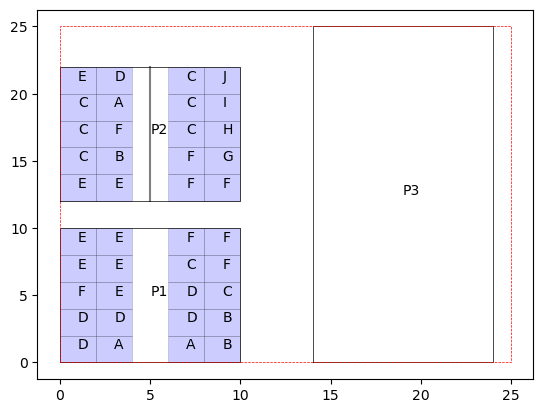

In [309]:
map.add_gdf(p2_parcel_gdf, label='OWNER', alpha=0.2, color='blue')
map.add_shape(p2_line)
map.plot()

### <a id='toc1_2_4_'></a>[Place 3 Parcel Data](#toc0_)

In [310]:
p3_p1 = mPolygon(origin=(14, 0), size=(2,2))
p3_p2 = mPolygon(origin=(14,2), size=(2,2))
p3_p3 = mPolygon(origin=(14,9), size=(2,2))
p3_p4 = mPolygon(origin=(14,11), size=(2,2))
p3_p5 = mPolygon(origin=(14,20), size=(2,2))
p3_p6 = mPolygon(origin=(14,22), size=(2,2))
p3_p7 = mPolygon(origin=(16,0), size=(2,2))
p3_p8 = mPolygon(origin=(16,2), size=(2,2))
p3_p9 = mPolygon(origin=(16,9), size=(2,2))
p3_p10 = mPolygon(origin=(16,11), size=(2,2))
p3_p11 = mPolygon(origin=(16,20), size=(2,2))
p3_p12 = mPolygon(origin=(16,22), size=(2,2))

p3_13 = mPolygon(origin=(20,0), size=(2,2))
p3_14 = mPolygon(origin=(20,2), size=(2,2))
p3_15 = mPolygon(origin=(20,9), size=(2,2))
p3_16 = mPolygon(origin=(20,11), size=(2,2))
p3_17 = mPolygon(origin=(20,20), size=(2,2))
p3_18 = mPolygon(origin=(20,22), size=(2,2))
p3_19 = mPolygon(origin=(22,0), size=(2,2))
p3_20 = mPolygon(origin=(22,2), size=(2,2))
p3_21 = mPolygon(origin=(22,9), size=(2,2))
p3_22 = mPolygon(origin=(22,11), size=(2,2))
p3_23 = mPolygon(origin=(22,20), size=(2,2))
p3_24 = mPolygon(origin=(22,22), size=(2,2))



# add line to map
p3_line = mLine(coords=[(19, 0), (19, 25)], color='black')

p3_parcels = [p3_p1, p3_p2, p3_p3, p3_p4, p3_p5, p3_p6, p3_p7, p3_p8, p3_p9, p3_p10, p3_p11, p3_p12, p3_13, p3_14, p3_15, p3_16, p3_17, p3_18, p3_19, p3_20, p3_21, p3_22, p3_23, p3_24]
p3_parcel_data = {
    'OWNER': ['A', 'A', 'B', 'B', 'C', 'C', 'A', 'A', 'B', 'B', 'D', 'D', 'E', 'E', 'F', 'F', 'G', 'D', 'I', 'D', 'F', 'J', 'D', 'G']
}
p3_parcel_gdf = GeoDataFrame(p3_parcel_data, p3_parcels).build()

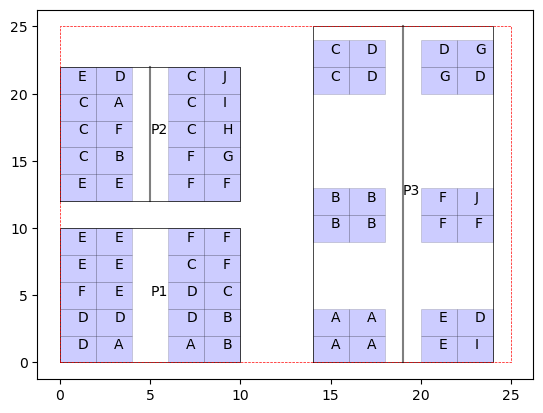

In [311]:
map.add_gdf(p3_parcel_gdf, label='OWNER', alpha=0.2, color='blue')
map.add_shape(p3_line)
map.plot()

In [312]:
parcels = pd.concat([p1_parcel_gdf, p2_parcel_gdf, p3_parcel_gdf], ignore_index=True)

In [313]:


def compute_regional_distance_matrix(df):
    """
    Computes the Distance Matrix for all polygons in each region (i.e. Place)
    Only the upper triangle of the matrix is computed as these are
    valid distances between polygons. The diagonal is removed as the
    distance between a polygon and itself is 0.
    """
    distance_matrix = df.geometry.apply(lambda g: df.distance(g)).values
    distances = distance_matrix[np.triu_indices_from(distance_matrix, k=1)]
    distances = distances[distances > 0]

    return distances

def compute_density(num_parcels):
    """
    Density is computed as the number of parcels divided by the total area of the region.
    
    """
    dens
    return density

def compute_nneighbors(density, min_nneighbors):
    """
    Scales the number of N Neighbors based on the density of the Region. 
    Takes the minimum of the computed value or the total number of parcels - 1
    """
    n_neighbors = max(1, int(min_nneighbors / density))
    return n_neighbors

def compute_optimal_distance(dmatrix, n_neighbors, min_urban_distance, max_distance):
    """
    Computes the optimal distance for the DBSCAN algorithm.
        -Nearest Neighbors is used to fit the distance matrix and compute the distances for n_neighbors nearest neighbors.
        Dmatrix is reshaped to a 2d array to fit the Nearest Neighbors model.
        -The distances are sorted and smoothed using a uniform filter. This gives us a smooth curve of sorted sitances which helps make the elbow more accurate.
        -The difference between the smoothed distances is computed to find the elbow point.
        -The optimal distance is computed as the distance at the elbow point. This distance is then rounded up and constrained to be between the min_urban_distance and max_distance.
        
        Min_urban_distance is the minimum distance between two liekly neighbors.
        Max_distance is the maximum distance between two likely neighbors. This will mostley be set to 200 meters.
    """
    knn = NearestNeighbors(n_neighbors=n_neighbors).fit(dmatrix.reshape(-1, 1))
    knn_distances, _ = knn.kneighbors(dmatrix.reshape(-1, 1))
    sorted_distances = np.sort(knn_distances[:, -1])
    smooth_dist = uniform_filter1d(sorted_distances, size=10)
    difference = np.diff(smooth_dist)
    elbow_index = np.argmax(difference) + 1

    # take distance from KNN elbow --> must be greater than min_urban_distance and less than max_distance
    knn_optimal_distance = smooth_dist[elbow_index]
    optimal_distance = min(max(ceil(knn_optimal_distance), min_urban_distance), max_distance)
    
    return optimal_distance, knn_optimal_distance

def polygon_distance(polygon1, polygon2):
    # Calculate the minimum distance between two polygons
    point1, point2 = nearest_points(polygon1, polygon2)
    return point1.distance(point2)

def compute_distance_matrix(polygons):
    # Create a distance matrix between all polygons
    num_polygons = len(polygons)
    distance_matrix = np.zeros((num_polygons, num_polygons))
    
    for i in range(num_polygons):
        for j in range(i + 1, num_polygons):
            distance_matrix[i, j] = polygon_distance(polygons[i], polygons[j])
            distance_matrix[j, i] = distance_matrix[i, j]  # Symmetry
    
    return distance_matrix

def add_attributes(df, **kwargs):
    for key, value in kwargs.items():
        df[key] = value
    return df

In [314]:
sub_parcel_map = Map()

In [ ]:
sample_size = 3 # clusters must have at least 3 parcels
min_urban_distance = 2 # min. distance between two likely neighbors
max_distance = 5 # max. distance between two likely neighbors
max_parcels_per_cluster = 8


all_clustered_parcel_data = gpd.GeoDataFrame()
all_single_parcel_data = gpd.GeoDataFrame()
for place_id, place_data in place_gdf.iterrows():
    place_id += 1
    #if place_id != 3:
    #    continue
    print(f"Processing place {place_id}")
    sub_parcels = parcels[parcels.within(place_data['geometry'])]

    # number of clustrs is proportional to the number of parcels
    nclusters = len(sub_parcels) // max_parcels_per_cluster
    print(f'Number of clusters for Kmeans: {nclusters}')
    kmeans =  KMeans(n_clusters=nclusters)
    sub_parcel_centroids = sub_parcels.centroid
    sub_parcel_coords = list(zip(sub_parcel_centroids.x, sub_parcel_centroids.y))
    regions = kmeans.fit_predict(sub_parcel_coords)
    sub_parcels['regions'] = regions
    sub_parcels['regions'] = sub_parcels['regions'].astype(str)
    sub_parcel_map.add_gdf(sub_parcels, label='regions', alpha=0.2, color='blue')
    
    for region in sub_parcels['regions'].unique():
        print('________________________________')
        print(f"Processing region {region}")
        clustered_parcel_data = gpd.GeoDataFrame()
        single_parcel_data = gpd.GeoDataFrame()
        
        regional_parcels = sub_parcels[sub_parcels['regions'] == region]
        regional_parcels_centroid = regional_parcels.centroid
        regional_parcels_coords = list(zip(regional_parcels_centroid.x, regional_parcels_centroid.y))
        
        regional_singles = []
        if len(regional_parcels) == 1:
            regional_singles.append(regional_parcels)
            continue
        
        dtree = cKDTree(regional_parcels_coords)
        density = (
            len(regional_parcels) /
            MultiPoint(regional_parcels_coords).convex_hull.area 
        )
        min_nneighbors = max(0.1 * len(regional_parcels), 3) # 10% of the total number of parcels
        n_neighbors = compute_nneighbors(density, min_nneighbors)
        knn_distances, _ = dtree.query(regional_parcels_coords, k=n_neighbors)
        sorted_distances = np.sort(knn_distances[:, -1])
        smooth_dist = uniform_filter1d(sorted_distances, size=10)
        difference = np.diff(smooth_dist)
        elbow_index = np.argmax(difference) + 1
        # take distance from KNN elbow --> must be greater than min_urban_distance and less than max_distance
        knn_optimal_distance = smooth_dist[elbow_index]
        if knn_optimal_distance > 30:
            knn_optimal_distance = 30
        optimal_distance = min(max(ceil(knn_optimal_distance), min_urban_distance), max_distance)
        

        print(f'Density for Place {place_id}, Region {region}: {density}')
        print(f'Min N Neighbors for Place {place_id}, Region {region}: {min_nneighbors}')
        print(f'N Neighbors for Place {place_id}, Region {region}: {n_neighbors}')
        print(f'KNN distance for Place {place_id}, Region {region}: {knn_optimal_distance}')
        print(f"Optimal distance for Place {place_id}, Region {region}: {optimal_distance}")
        
        unique_owners = regional_parcels['OWNER'].unique()
        
        for owner in unique_owners:
            print(f"Processing owner {owner}")
            owner_parcels = regional_parcels[regional_parcels['OWNER'] == owner]
            
            #print(f"Owner {owner} has {len(owner_parcels)} parcels")
            polygons = owner_parcels['geometry'].to_list()
            distance_matrix = compute_distance_matrix(polygons)
            if distance_matrix.shape[0] < 3: # only two parcels
                print(f'Owner {owner} has less than 3 parcels')
                single_parcel_data = pd.concat([single_parcel_data, owner_parcels], ignore_index=True)  
                single_parcel_data = add_attributes(
                    single_parcel_data,
                    place_id=place_id,
                    )
                continue

            dbscan = DBSCAN(eps=optimal_distance, min_samples=sample_size, metric='precomputed')
            clusters = dbscan.fit_predict(distance_matrix)

            owner_parcels['cluster'] = clusters # clustert ID
            owner_parcels['area'] = owner_parcels['geometry'].area
            counts = owner_parcels['cluster'].value_counts() # pd.series of cluster counts
        
            outliers = counts[counts.index == -1].index # outliers always identified as -1
            counts = counts[counts.index != -1] # drop outliers

            single_parcel_filter_ids = set(list(outliers)) # not apart of any cluster
                
            single_parcel_filter = owner_parcels[owner_parcels['cluster'].isin(single_parcel_filter_ids)].drop(columns=['cluster', 'area'])
            single_parcel_data = pd.concat([single_parcel_data, single_parcel_filter], ignore_index=True)

            if len(single_parcel_filter) > 0:
                single_parcel_filter = add_attributes(
                    single_parcel_filter,
                    place_id=place_id,
                )
            
            
            cluster_filter = owner_parcels[~owner_parcels['cluster'].isin(single_parcel_filter_ids)]
            if len(cluster_filter) > 0:
                cluster_filter = add_attributes(
                    cluster_filter,
                    pcount=cluster_filter['cluster'].map(counts),
                    knn_dst=knn_optimal_distance,
                    opt_dst=optimal_distance,
                    place_id=place_id
                )
                clustered_parcel_data = pd.concat([clustered_parcel_data, cluster_filter], ignore_index=True)
           
                # create cluster ID
        if len(clustered_parcel_data) != 0:
            clustered_parcel_data['cluster_ID'] = (
                clustered_parcel_data['OWNER'] + 
                '_' + 
                str(place_id) +
                '-' +
                str(region) +
                '-' + 
                clustered_parcel_data['cluster'].astype(str)
            )

        if len(single_parcel_data) != 0:
            #print(f'single parcel data: region:{region}, owner:{owner}')
            single_parcel_data['cluster_ID'] = (
                single_parcel_data['OWNER'] + 
                '_' + 
                str(place_id) +
                '-' +
                str(region) +
                '-' +
                'X'
            )
        print('________________________________')
                
        all_clustered_parcel_data = pd.concat([all_clustered_parcel_data, clustered_parcel_data], ignore_index=True)
        all_single_parcel_data = pd.concat([all_single_parcel_data, single_parcel_data], ignore_index=True)

Processing place 1
Number of clusters for Kmeans: 2
________________________________
Processing region 1
Density for Place 1, Region 1: 0.625
Min N Neighbors for Place 1, Region 1: 3
N Neighbors for Place 1, Region 1: 4
KNN distance for Place 1, Region 1: 2.082842712474619
Optimal distance for Place 1, Region 1: 3
Processing owner D
Processing owner F
Owner F has less than 3 parcels
Processing owner E
Processing owner A
Owner A has less than 3 parcels
________________________________
________________________________
Processing region 0
Density for Place 1, Region 0: 0.625
Min N Neighbors for Place 1, Region 0: 3
N Neighbors for Place 1, Region 0: 4
KNN distance for Place 1, Region 0: 2.082842712474619
Optimal distance for Place 1, Region 0: 3
Processing owner A
Owner A has less than 3 parcels
Processing owner D
Owner D has less than 3 parcels
Processing owner C
Owner C has less than 3 parcels
Processing owner F
Processing owner B
Owner B has less than 3 parcels
________________________

None

None

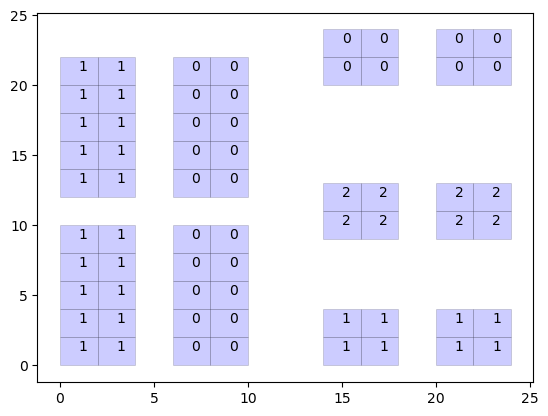

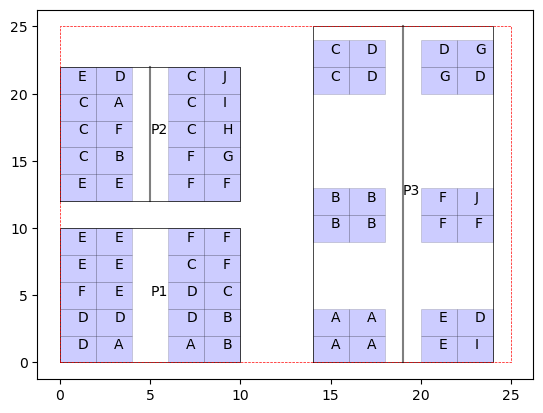

In [316]:
display(sub_parcel_map.plot())
display(map.plot())

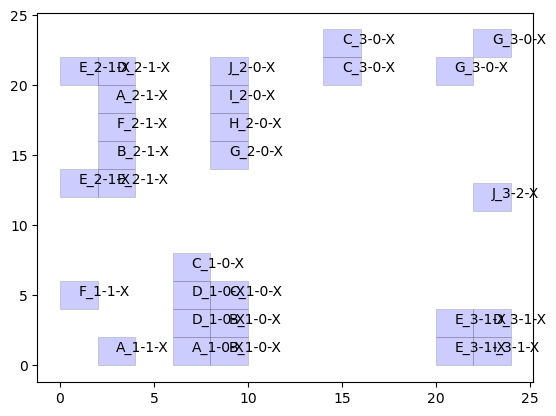

In [317]:
single_parcel_map = Map()
single_parcel_map.add_gdf(all_single_parcel_data, label='cluster_ID', alpha=0.2, color='blue')
single_parcel_map.plot()

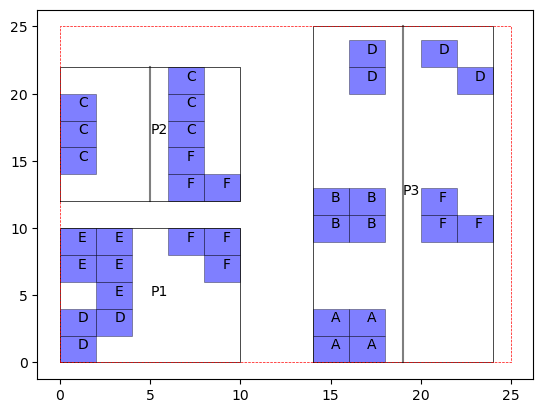

In [318]:
map.remove(p1_parcel_gdf)
map.remove(p2_parcel_gdf)
map.remove(p3_parcel_gdf)
map.add_gdf(all_clustered_parcel_data, label='OWNER')
map.plot()

In [319]:
parcel_dissolve = all_clustered_parcel_data.dissolve(by='cluster_ID').reset_index()

In [320]:
parcel_dissolve['geometry'] = parcel_dissolve.apply(lambda x: x['geometry'].buffer(x['opt_dst']), axis=1)
parcel_dissolve['geometry'] = parcel_dissolve.apply(lambda x: x['geometry'].buffer(-x['opt_dst']), axis=1)
parcel_dissolve = parcel_dissolve.explode(index_parts=True)


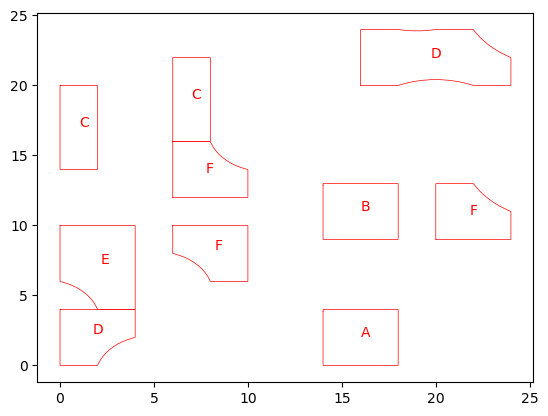

In [321]:
cluster_map = Map()
cluster_map.add_gdf(parcel_dissolve, alpha=0, edgecolor='red', label='OWNER', label_color='red')
cluster_map.plot()

In [322]:
map.add_gdf(parcel_dissolve, alpha=0, edgecolor='red', label='OWNER', label_color='red')

In [323]:
map.add_gdf(all_single_parcel_data, label='OWNER', color='green')

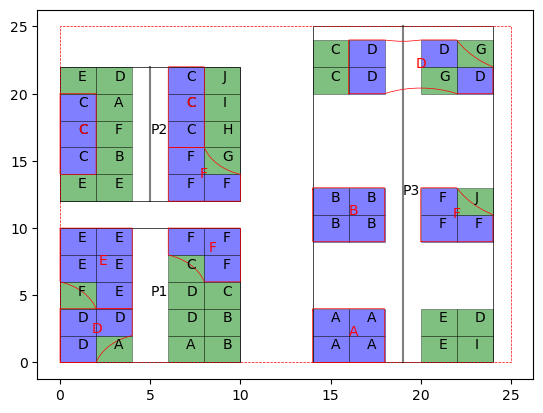

In [324]:
map.plot()

## <a id='toc1_5_'></a>[IV. Cross-Region Clustering](#toc0_)

### <a id='toc1_5_1_'></a>[Step 1: Identify Single Parcels within the Optimal Distance](#toc0_)


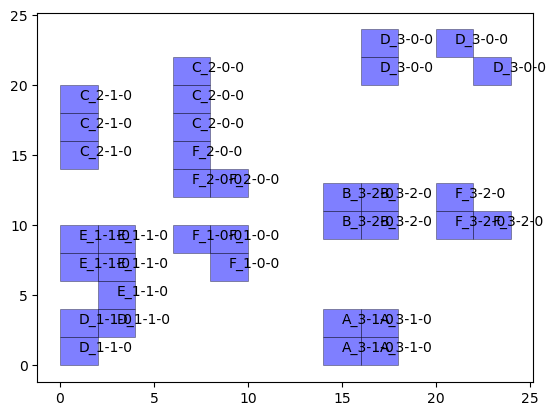

In [325]:
pre_merge_map = Map()
pre_merge_map.add_gdf(all_clustered_parcel_data, label='cluster_ID', color='blue')
pre_merge_map.plot()

In [326]:
all_clustered_parcel_data = all_clustered_parcel_data.reset_index(drop=False)
all_single_parcel_data = all_single_parcel_data.reset_index(drop=False)

In [327]:
all_single_parcel_data

,index,OWNER,geometry,regions,place_id,cluster_ID
0,0,F,"POLYGON ((0.00000 4.00000, 2.00000 4.00000, 2....",1,1,F_1-1-X
1,1,A,"POLYGON ((2.00000 0.00000, 4.00000 0.00000, 4....",1,1,A_1-1-X
2,2,A,"POLYGON ((6.00000 0.00000, 8.00000 0.00000, 8....",0,1,A_1-0-X
3,3,D,"POLYGON ((6.00000 2.00000, 8.00000 2.00000, 8....",0,1,D_1-0-X
4,4,D,"POLYGON ((6.00000 4.00000, 8.00000 4.00000, 8....",0,1,D_1-0-X
5,5,C,"POLYGON ((6.00000 6.00000, 8.00000 6.00000, 8....",0,1,C_1-0-X
6,6,C,"POLYGON ((8.00000 4.00000, 10.00000 4.00000, 1...",0,1,C_1-0-X
7,7,B,"POLYGON ((8.00000 0.00000, 10.00000 0.00000, 1...",0,1,B_1-0-X
8,8,B,"POLYGON ((8.00000 2.00000, 10.00000 2.00000, 1...",0,1,B_1-0-X
9,9,E,"POLYGON ((0.00000 12.00000, 2.00000 12.00000, ...",1,2,E_2-1-X


In [328]:
for single_id, single_data in all_single_parcel_data.iterrows():
    
    owner = single_data['OWNER']
   
    
    
    same_owner_n = all_clustered_parcel_data[(all_clustered_parcel_data['OWNER'] == owner)]
    
    if same_owner_n.empty:
        continue
    same_owner_n['cross_dist'] = same_owner_n['geometry'].apply(lambda x: polygon_distance(x, single_data['geometry']))
    same_owner_nclusters = same_owner_n.loc[same_owner_n['cross_dist'] <= 3]
    
    
    if same_owner_nclusters.empty:
        continue
    print('Adding Owner: ', owner)
    same_owner_ncluster = same_owner_nclusters.loc[same_owner_nclusters['cross_dist'].idxmin(), 'cluster_ID']
   
    add_single = all_single_parcel_data[all_single_parcel_data.index == single_id][['OWNER', 'geometry']]
    merge_n = all_clustered_parcel_data[all_clustered_parcel_data['cluster_ID'] == same_owner_ncluster]
    all_clustered_parcel_data = all_clustered_parcel_data[all_clustered_parcel_data['cluster_ID'] != same_owner_ncluster]

    
    same_owner_merge = pd.concat([merge_n, add_single], ignore_index=True)
    new_row_index = same_owner_merge.index[-1]
    source_row_index = same_owner_merge.index[0]
    for col in same_owner_merge.columns:
        if col != 'geometry':  # Skip the geometry field
            same_owner_merge.at[new_row_index, col] = same_owner_merge.at[source_row_index, col]

    all_clustered_parcel_data = pd.concat([all_clustered_parcel_data, same_owner_merge], ignore_index=True)
    

    
    
    
    

Adding Owner:  D
Adding Owner:  D
Adding Owner:  E
Adding Owner:  E
Adding Owner:  F


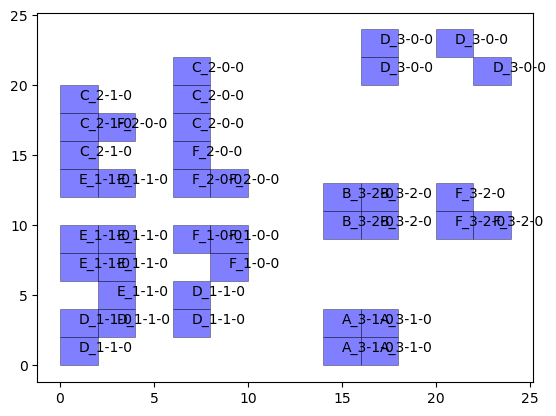

In [329]:
new_map = Map()
new_map.add_gdf(all_clustered_parcel_data, label='cluster_ID', color='blue')
new_map.plot()

### <a id='toc1_5_2_'></a>[Step 2: Identify Same-Owner Clusters in different regions within the Optimal Distance](#toc0_)

In [330]:
def merge_cross_region_clusters(df, max_merge_distance=4):
    # Step 1: Identify owners spanning multiple regions
    owner_region_count = df.groupby(['OWNER', 'place_id']).size().unstack(fill_value=0)
    multi_region_owners = owner_region_count[owner_region_count.sum(axis=1) > 1].index

    # Step 2: For each multi-region owner, check distances between clusters
    for owner in multi_region_owners:
        
        owner_df = df[df['OWNER'] == owner]
        
        # Extract centroids for each cluster of the owner
        centroids = owner_df.geometry.centroid
        coords = list(zip(centroids.x, centroids.y))

        # Build a KDTree for fast distance lookup
        tree = cKDTree(coords)

        # Find pairs of clusters within the max_merge_distance
        pairs = tree.query_pairs(max_merge_distance)
        
        # Merge clusters if they are close enough
        for i, j in pairs:
            cluster_i = owner_df.iloc[i]['cluster_ID']
            cluster_j = owner_df.iloc[j]['cluster_ID']

            # Update cluster_ID to merge them
            df.loc[df['cluster_ID'] == cluster_j, 'cluster_ID'] = cluster_i

    return df


### <a id='toc1_5_3_'></a>[Step 3: Dissolve and Reverse Buffer](#toc0_)

In [331]:
all_clustered_parcel_data_merged = merge_cross_region_clusters(all_clustered_parcel_data)

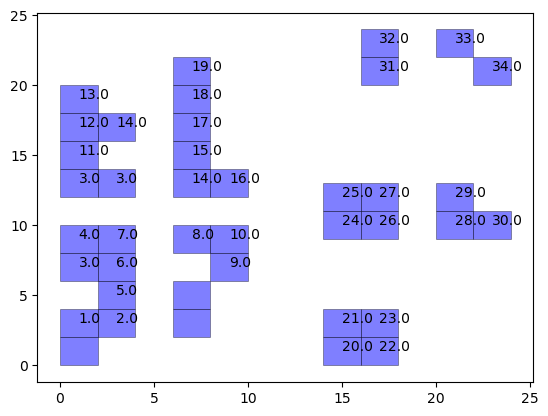

In [332]:
all_clustered_parcel_data.reset_index(inplace=True)
all_cluster_map = Map()
all_cluster_map.add_gdf(all_clustered_parcel_data, label='index', color='blue')
all_cluster_map.plot()

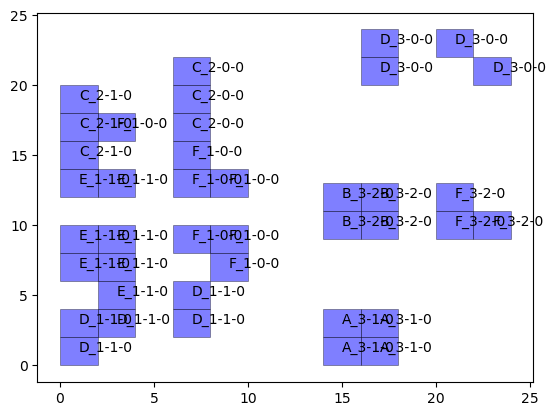

In [333]:
new_map.remove(all_clustered_parcel_data)
new_map.add_gdf(all_clustered_parcel_data_merged, label='cluster_ID', color='blue')
new_map.plot()


In [334]:
parcel_dissolve_merge = all_clustered_parcel_data_merged.dissolve(by='cluster_ID').reset_index()
parcel_dissolve_merge

,cluster_ID,geometry,level_0,index,OWNER,regions,cluster,area,pcount,knn_dst,opt_dst,place_id
0,A_3-1-0,"POLYGON ((14.00000 2.00000, 14.00000 4.00000, ...",9,20.0,A,1,0.0,4.0,4.0,5.027862,5.0,3.0
1,B_3-2-0,"POLYGON ((14.00000 11.00000, 14.00000 13.00000...",13,24.0,B,2,0.0,4.0,4.0,5.027862,5.0,3.0
2,C_2-0-0,"POLYGON ((8.00000 16.00000, 6.00000 16.00000, ...",6,17.0,C,0,0.0,4.0,3.0,2.082843,3.0,2.0
3,C_2-1-0,"POLYGON ((2.00000 14.00000, 0.00000 14.00000, ...",3,11.0,C,1,0.0,4.0,3.0,2.082843,3.0,2.0
4,D_1-1-0,"MULTIPOLYGON (((0.00000 0.00000, 0.00000 2.000...",24,0.0,D,1,0.0,4.0,3.0,2.082843,3.0,1.0
5,D_3-0-0,"MULTIPOLYGON (((18.00000 20.00000, 16.00000 20...",20,31.0,D,0,0.0,4.0,4.0,5.027862,5.0,3.0
6,E_1-1-0,"MULTIPOLYGON (((2.00000 4.00000, 2.00000 6.000...",29,3.0,E,1,0.0,4.0,5.0,2.082843,3.0,1.0
7,F_1-0-0,"MULTIPOLYGON (((8.00000 6.00000, 8.00000 8.000...",0,8.0,F,0,0.0,4.0,3.0,2.082843,3.0,1.0
8,F_3-2-0,"POLYGON ((20.00000 9.00000, 20.00000 11.00000,...",17,28.0,F,2,0.0,4.0,3.0,5.027862,5.0,3.0


In [335]:
parcel_dissolve_merge['geometry'] = parcel_dissolve_merge.apply(lambda x: x['geometry'].buffer(x['opt_dst']), axis=1)
parcel_dissolve_merge['geometry'] = parcel_dissolve_merge.apply(lambda x: x['geometry'].buffer(-x['opt_dst']), axis=1)

In [337]:
display(parcel_dissolve_merge.sort_values(by='place_id'))

,cluster_ID,geometry,level_0,index,OWNER,regions,cluster,area,pcount,knn_dst,opt_dst,place_id
4,D_1-1-0,"POLYGON ((0.00345 3.99655, 0.07365 4.00000, 3....",24,0.0,D,1,0.0,4.0,3.0,2.082843,3.0,1.0
6,E_1-1-0,"POLYGON ((0.00594 10.00886, 0.08548 10.27106, ...",29,3.0,E,1,0.0,4.0,5.0,2.082843,3.0,1.0
7,F_1-0-0,"POLYGON ((2.00345 16.00345, 2.00000 16.07365, ...",0,8.0,F,0,0.0,4.0,3.0,2.082843,3.0,1.0
2,C_2-0-0,"POLYGON ((6.00345 16.00345, 6.00000 16.07365, ...",6,17.0,C,0,0.0,4.0,3.0,2.082843,3.0,2.0
3,C_2-1-0,"POLYGON ((0.00345 19.99655, 0.07365 20.00000, ...",3,11.0,C,1,0.0,4.0,3.0,2.082843,3.0,2.0
0,A_3-1-0,"POLYGON ((14.00000 3.87726, 14.00575 3.99425, ...",9,20.0,A,1,0.0,4.0,4.0,5.027862,5.0,3.0
1,B_3-2-0,"POLYGON ((14.00000 12.87726, 14.00575 12.99425...",13,24.0,B,2,0.0,4.0,4.0,5.027862,5.0,3.0
5,D_3-0-0,"POLYGON ((16.00575 20.00575, 16.00000 20.12274...",20,31.0,D,0,0.0,4.0,4.0,5.027862,5.0,3.0
8,F_3-2-0,"POLYGON ((20.00575 9.00575, 20.00000 9.12274, ...",17,28.0,F,2,0.0,4.0,3.0,5.027862,5.0,3.0


## <a id='toc1_6_'></a>[V. Cross-Region Clustering Results](#toc0_)

The results of this process have added **P2-E** and **P2-F** to **P1-E** and **P1-F** respectively. This is because the distance between **P1** and **P2** is within the optimal distance.

#### <a id='toc1_6_1_1_'></a>[Final Thoughts:](#toc0_)
- The process has effectively clustered same-owner parcels within each place boundary using a dynamically calcualted eplison based on the density of the region.
- The process has also effectively clustered same-owner parcels between place boundaries using a cross-region clustering process.


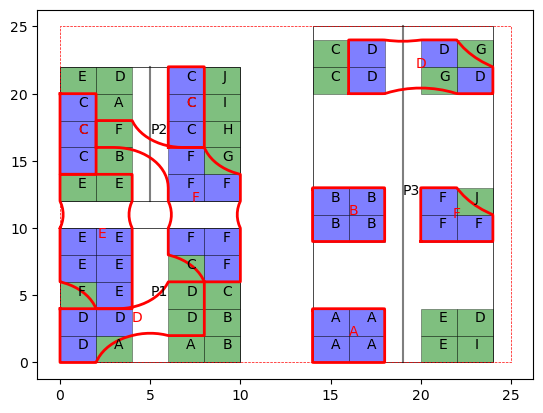

In [336]:
map.remove(parcel_dissolve)
map.add_gdf(parcel_dissolve_merge, alpha=0, edgecolor='red', label='OWNER', label_color='red', linewidth=2)
map.plot()